In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [12]:
data = pd.read_csv("Bostonhousingdataset.csv")
# print(data.head())
# print(data.tail())

In [ ]:
df = data
df = df.dropna()
colname = 'MEDV'
Q1 = df[colname].quantile(0.25)
Q3 = df[colname].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df1 = df[(df[colname]<lower) | (df[colname]>upper)]
print("Q1:",Q1,"Q3:",Q3,"IQR:",IQR,"upper:",upper,"lower:",lower)
print(df1.shape[0])
df1

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


## 處理 Null

### replace null

In [25]:
data = pd.read_csv("Bostonhousingdataset.csv")
condition = data.isnull().any(axis='columns')
data[condition]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [ ]:
df = pd.read_csv('學生月考成績檔.csv')
df = df.dropna()
df.info()

In [ ]:
# df = pd.read_csv('學生月考成績檔.csv')
# df['國文'] = df['國文'].fillna(df['國文'].mean())
# df['英文'] = df['英文'].fillna(df['英文'].mean())
# df['數學'] = df['數學'].fillna(df['數學'].mean())
# df['歷史'] = df['歷史'].fillna(df['歷史'].mean())
# df['地理'] = df['地理'].fillna(df['地理'].mean())
# df

for column in data.columns[data.isnull().any()]:
    data[column].fillna(data[column].median(), inplace=True)

print(data.isnull().sum())


### delete null

In [19]:
data = pd.read_csv("Bostonhousingdataset.csv")

In [ ]:
df = pd.read_csv('學生月考成績檔.csv')
df = df.dropna()
df.info()

==================================================

## dlupicate

In [20]:
data = pd.read_csv("Bostonhousingdataset.csv")
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

=========================================================

## 離群值

In [26]:
data = pd.read_csv("Bostonhousingdataset.csv")
print('MEDV average: %.3f' %data['MEDV'].mean())
q3 = data['MEDV'].quantile(0.75)
print('MEDV Q3: %.3f' %q3)
q1 = data['MEDV'].quantile(0.25)
print('MEDV Q1: %.3f' %q1)
print('IQR  %.3f' % (q3 - q1))
print('upper:  %.3f' %(data.loc[:,'MEDV'].quantile(0.5) + 1.5*(q3-q1)))
print('lower:  %.3f' %(data.loc[:,'MEDV'].quantile(0.5) - 1.5*(q3-q1)))


MEDV average: 22.533
MEDV Q3: 25.000
MEDV Q1: 17.025
IQR  7.975
upper:  33.163
lower:  9.237


In [3]:
print('var')
print(data.var())
print()

print('std')
print(data.std())
print()

print('Max')
print(data.max())
print()

print('min')
print(data.min())
print()

var
CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
dtype: float64

std
CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
dtype: float64

Max
CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64

min
CRIM        

In [8]:
print('MEDV average: %.3f' %data['MEDV'].mean())
print('MEDV Q3: %.3f' %data['MEDV'].quantile(0.75))
print('MEDV Q1: %.3f' %data['MEDV'].quantile(0.25))
print('MEDV Q1: %.3f' %data.loc[:,'MEDV'].quantile(0.25))
data.loc[:,'MEDV'].quantile(0.25)

MEDV average: 22.533
MEDV Q3: 25.000
MEDV Q1: 17.025
MEDV Q1: 17.025


np.float64(17.025)

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


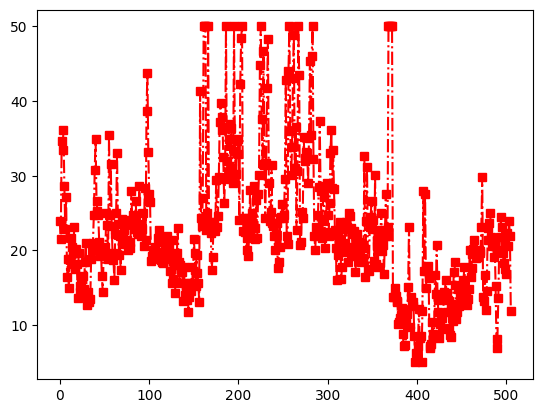

In [9]:
x = []
y = []
for i in range(len(data['MEDV'])):
    x.append(i)
    y.append(data['MEDV'][i])
plt.plot(x,y,'r-.s')
plt.show()

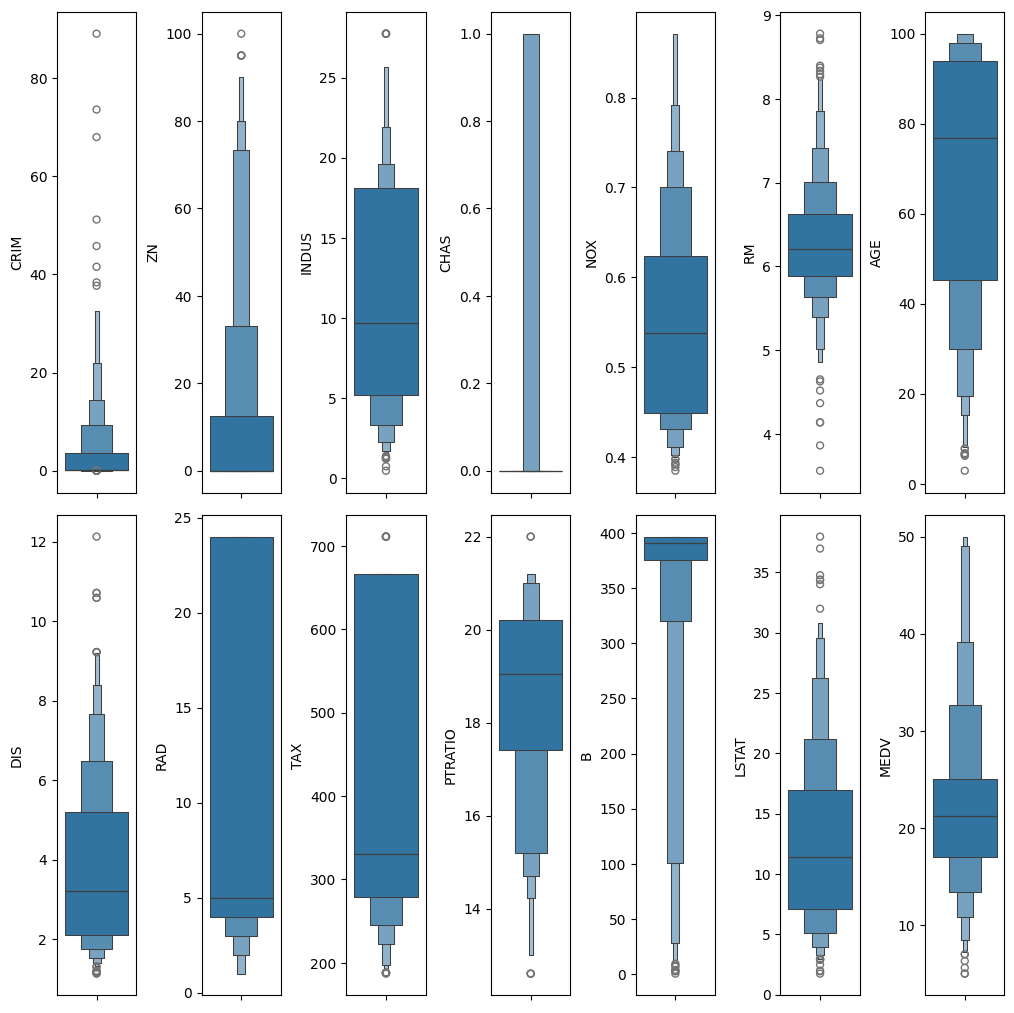

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize = (10, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxenplot(y=k, data=data, ax=axs[index])
    index+=1
plt.tight_layout(pad=0.2, w_pad=0.7, h_pad= 1.0)